In [79]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [80]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report


In [81]:
!pip install -U -q PyDrive

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials


# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)


In [82]:
link= "https://drive.google.com/file/d/1Nb5qdH5JL-t5it7n17m2o8ajNOk_h2GD/view?usp=sharing"

import pandas as pd

# to get the id part of the file
id = link.split("/")[-2]

downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('xclara.csv')

churn_data = pd.read_csv('xclara.csv')
print(churn_data)

      RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
0             1    15634602   Hargrave          619    France  Female   42   
1             2    15647311       Hill          608     Spain  Female   41   
2             3    15619304       Onio          502    France  Female   42   
3             4    15701354       Boni          699    France  Female   39   
4             5    15737888   Mitchell          850     Spain  Female   43   
...         ...         ...        ...          ...       ...     ...  ...   
9995       9996    15606229   Obijiaku          771    France    Male   39   
9996       9997    15569892  Johnstone          516    France    Male   35   
9997       9998    15584532        Liu          709    France  Female   36   
9998       9999    15682355  Sabbatini          772   Germany    Male   42   
9999      10000    15628319     Walker          792    France  Female   28   

      Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMemb

In [83]:
#file_path = '/content/drive/My Drive/Churn_Modelling.csv'
#churn_data = pd.read_csv(file_path)
#churn_data.head()

In [84]:
churn_data['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [85]:
churn_data['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [86]:
churn_data.info()       # Overview of columns and data types
churn_data.describe()   # Basic statistical summary


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [87]:
churn_data.isnull().sum()  #checking for null values

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


In [88]:
# Encoding categorical variables
label_encoder = LabelEncoder()
churn_data['Geography'] = label_encoder.fit_transform(churn_data['Geography'])
churn_data['Gender'] = label_encoder.fit_transform(churn_data['Gender'])
churn_data.head()


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [89]:
# # Scaling numerical features
# scaler = StandardScaler()
# numerical_features = ['CreditScore', 'Tenure', 'Balance', 'EstimatedSalary']
# churn_data[numerical_features] = scaler.fit_transform(churn_data[numerical_features])

# churn_data.head()


## Feature Engineering

In [90]:
# 1. Create Interaction Features
# Balance per Product (handling cases where NumOfProducts is zero to avoid division by zero)
churn_data['Balance_per_Product'] = np.where(churn_data['NumOfProducts'] > 0,
                                             churn_data['Balance'] / churn_data['NumOfProducts'], 0)

# Credit Score per Age
churn_data['CreditScore_per_Age'] = churn_data['CreditScore'] / churn_data['Age']

churn_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Balance_per_Product,CreditScore_per_Age
0,1,15634602,Hargrave,619,0,0,42,2,0.00,1,1,1,101348.88,1,0.000000,14.738095
1,2,15647311,Hill,608,2,0,41,1,83807.86,1,0,1,112542.58,0,83807.860000,14.829268
2,3,15619304,Onio,502,0,0,42,8,159660.80,3,1,0,113931.57,1,53220.266667,11.952381
3,4,15701354,Boni,699,0,0,39,1,0.00,2,0,0,93826.63,0,0.000000,17.923077
4,5,15737888,Mitchell,850,2,0,43,2,125510.82,1,1,1,79084.10,0,125510.820000,19.767442


In [91]:
# 2. Create New Features Based on Customer Behavior
# High Balance Flag (setting a threshold of 100,000)
churn_data['High_Balance'] = (churn_data['Balance'] > 100000).astype(int)

# Senior Citizen Flag (age above 60)
churn_data['Senior_Citizen'] = (churn_data['Age'] > 60).astype(int)

churn_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Balance_per_Product,CreditScore_per_Age,High_Balance,Senior_Citizen
0,1,15634602,Hargrave,619,0,0,42,2,0.00,1,1,1,101348.88,1,0.000000,14.738095,0,0
1,2,15647311,Hill,608,2,0,41,1,83807.86,1,0,1,112542.58,0,83807.860000,14.829268,0,0
2,3,15619304,Onio,502,0,0,42,8,159660.80,3,1,0,113931.57,1,53220.266667,11.952381,1,0
3,4,15701354,Boni,699,0,0,39,1,0.00,2,0,0,93826.63,0,0.000000,17.923077,0,0
4,5,15737888,Mitchell,850,2,0,43,2,125510.82,1,1,1,79084.10,0,125510.820000,19.767442,1,0


In [92]:
churn_data['Senior_Citizen'].unique()

array([0, 1])

In [93]:
# 3. Combine Features to Create Engagement Scores
# Engagement Score combining 'IsActiveMember' and 'NumOfProducts'
churn_data['Engagement_Score'] = churn_data['IsActiveMember'] * churn_data['NumOfProducts']

churn_data.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Balance_per_Product,CreditScore_per_Age,High_Balance,Senior_Citizen,Engagement_Score
0,1,15634602,Hargrave,619,0,0,42,2,0.00,1,1,1,101348.88,1,0.000000,14.738095,0,0,1
1,2,15647311,Hill,608,2,0,41,1,83807.86,1,0,1,112542.58,0,83807.860000,14.829268,0,0,1
2,3,15619304,Onio,502,0,0,42,8,159660.80,3,1,0,113931.57,1,53220.266667,11.952381,1,0,0
3,4,15701354,Boni,699,0,0,39,1,0.00,2,0,0,93826.63,0,0.000000,17.923077,0,0,0
4,5,15737888,Mitchell,850,2,0,43,2,125510.82,1,1,1,79084.10,0,125510.820000,19.767442,1,0,1
5,6,15574012,Chu,645,2,1,44,8,113755.78,2,1,0,149756.71,1,56877.890000,14.659091,1,0,0
6,7,15592531,Bartlett,822,0,1,50,7,0.00,2,1,1,10062.80,0,0.000000,16.440000,0,0,2
7,8,15656148,Obinna,376,1,0,29,4,115046.74,4,1,0,119346.88,1,28761.685000,12.965517,1,0,0
8,9,15792365,He,501,0,1,44,4,142051.07,2,0,1,74940.50,0,71025.535000,11.386364,1,0,2
9,10,15592389,H?,684,0,1,27,2,134603.88,1,1,1,71725.73,0,134603.880000,25.333333,1,0,1


In [94]:
churn_data['Age'].unique()

array([42, 41, 39, 43, 44, 50, 29, 27, 31, 24, 34, 25, 35, 45, 58, 32, 38,
       46, 36, 33, 40, 51, 61, 49, 37, 19, 66, 56, 26, 21, 55, 75, 22, 30,
       28, 65, 48, 52, 57, 73, 47, 54, 72, 20, 67, 79, 62, 53, 80, 59, 68,
       23, 60, 70, 63, 64, 18, 82, 69, 74, 71, 76, 77, 88, 85, 84, 78, 81,
       92, 83])

## EDA

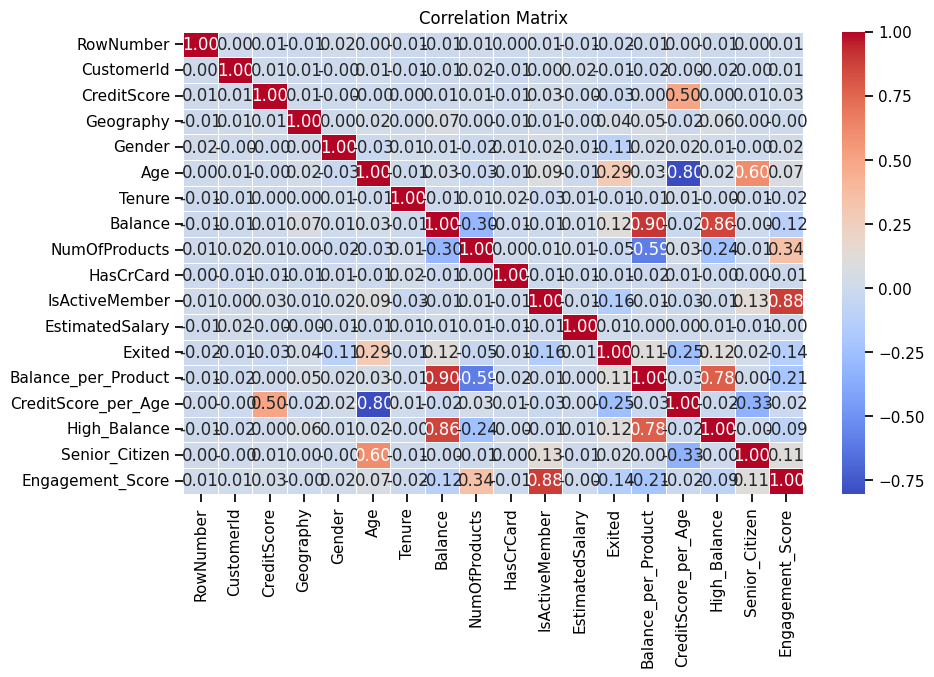

In [95]:
# Select only numeric columns for the correlation matrix
numerical_features = churn_data.select_dtypes(include=['float64', 'int64']).columns

# Compute the correlation matrix
corr_matrix = churn_data[numerical_features].corr()

# Plot the heatmap
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()


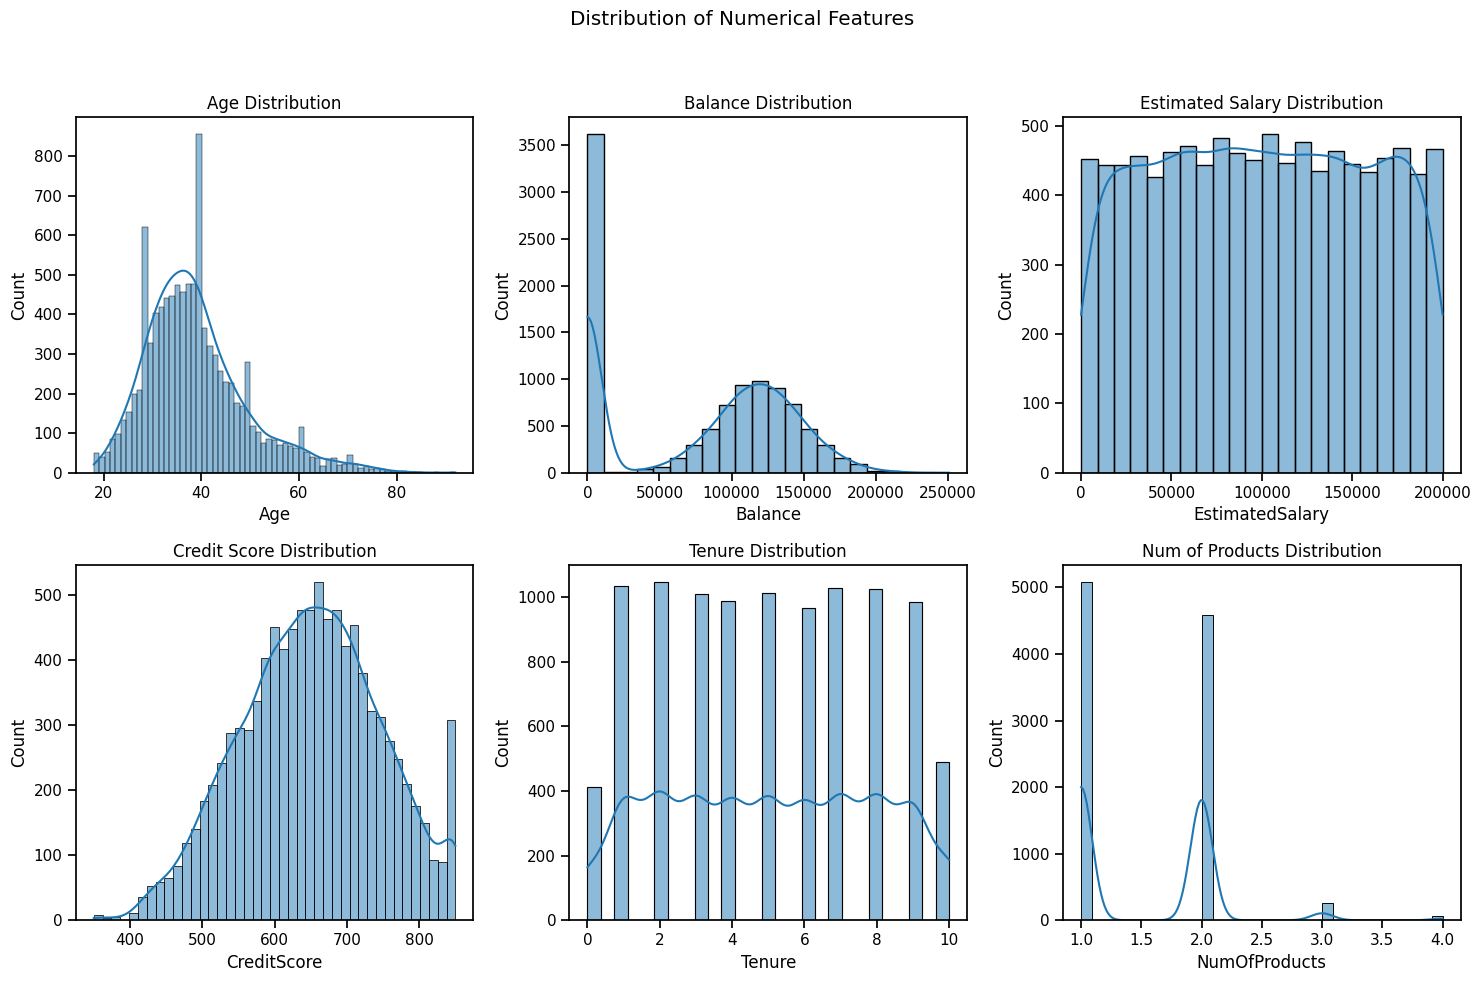

In [96]:
plt.style.use('default')
sns.set_context('notebook')

# 1. Plot Distribution of Numerical Features
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Distribution of Numerical Features')

# Age Distribution
sns.histplot(churn_data['Age'], kde=True, ax=axes[0, 0]).set_title("Age Distribution")

# Balance Distribution
sns.histplot(churn_data['Balance'], kde=True, ax=axes[0, 1]).set_title("Balance Distribution")

# Estimated Salary Distribution
sns.histplot(churn_data['EstimatedSalary'], kde=True, ax=axes[0, 2]).set_title("Estimated Salary Distribution")

# Credit Score Distribution
sns.histplot(churn_data['CreditScore'], kde=True, ax=axes[1, 0]).set_title("Credit Score Distribution")

# Tenure Distribution
sns.histplot(churn_data['Tenure'], kde=True, ax=axes[1, 1]).set_title("Tenure Distribution")

# NumOfProducts Distribution
sns.histplot(churn_data['NumOfProducts'], kde=True, ax=axes[1, 2]).set_title("Num of Products Distribution")

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

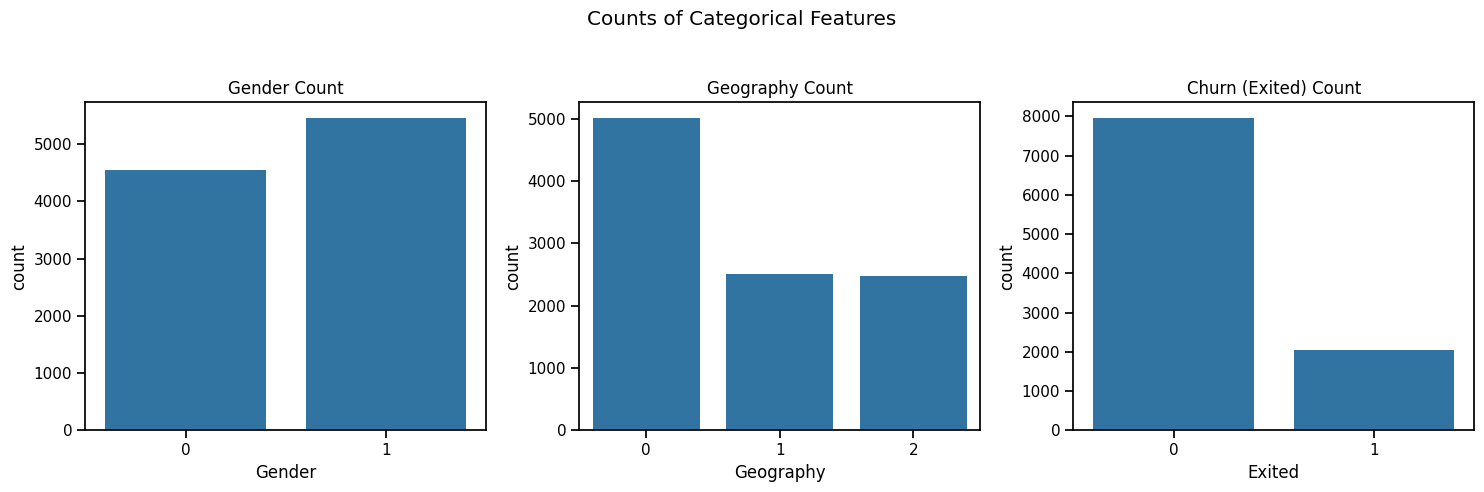

In [97]:
# 2. Categorical Feature Counts
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Counts of Categorical Features')

# Gender Count Plot
sns.countplot(x='Gender', data=churn_data, ax=axes[0]).set_title("Gender Count")

# Geography Count Plot
sns.countplot(x='Geography', data=churn_data, ax=axes[1]).set_title("Geography Count")

# Exited (Churn) Count Plot
sns.countplot(x='Exited', data=churn_data, ax=axes[2]).set_title("Churn (Exited) Count")

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

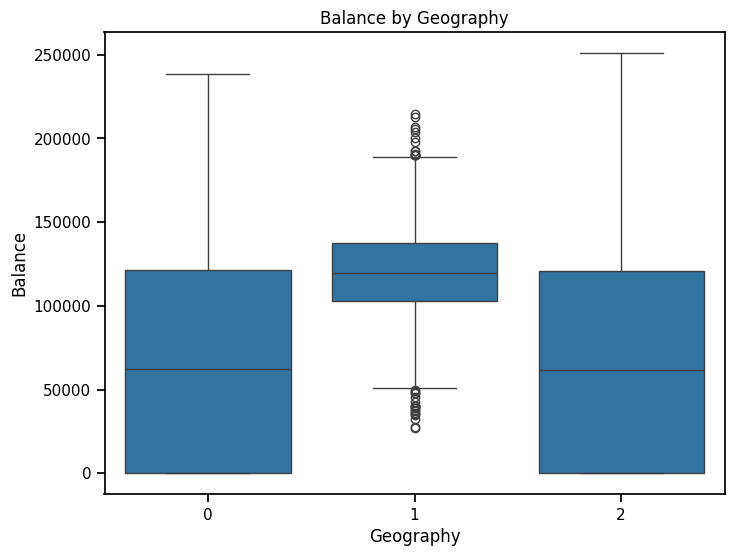

In [98]:
# 3. Boxplot of Balance by Geography
plt.figure(figsize=(8, 6))
sns.boxplot(x='Geography', y='Balance', data=churn_data)
plt.title("Balance by Geography")
plt.show()

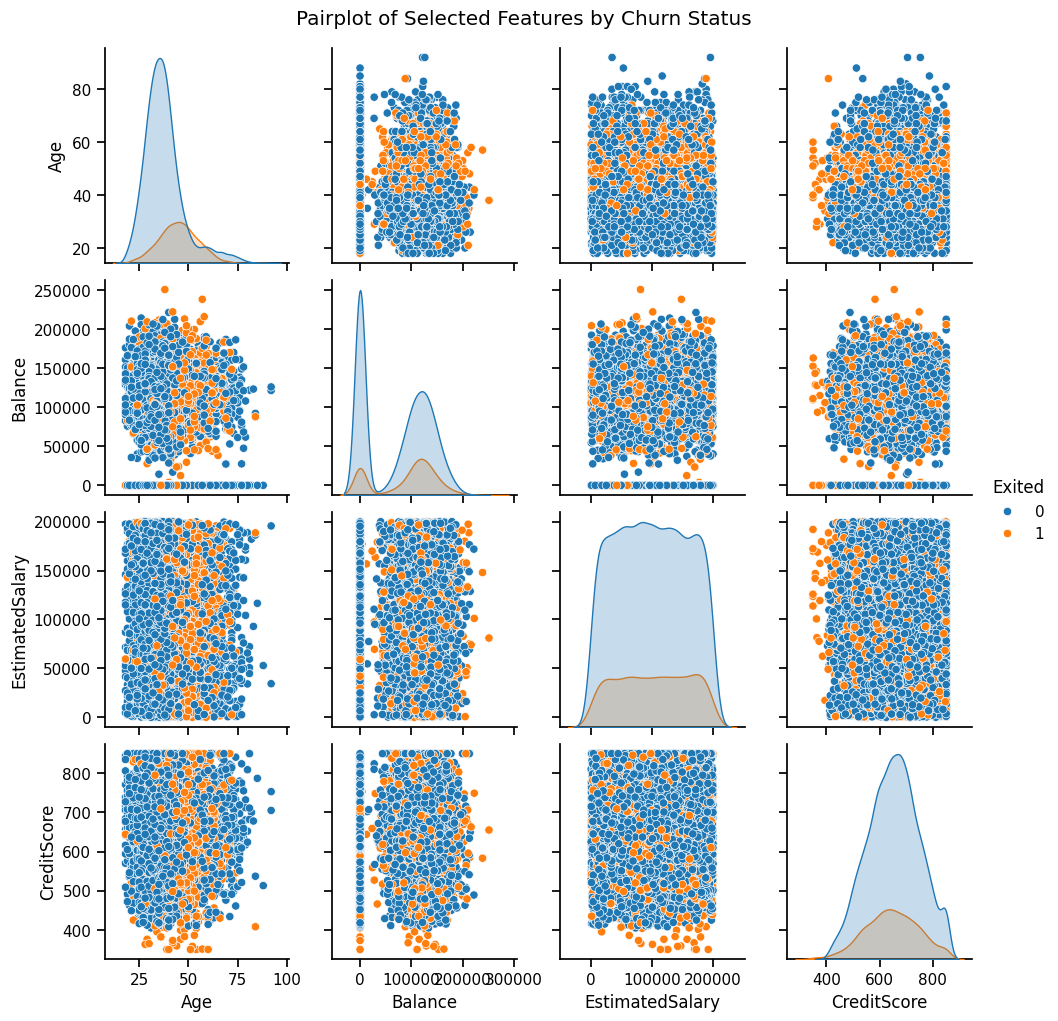

In [99]:
# 4. Pairplot for Selected Features
selected_features = ['Age', 'Balance', 'EstimatedSalary', 'CreditScore', 'Exited']
sns.pairplot(churn_data[selected_features], hue='Exited', diag_kind='kde')
plt.suptitle("Pairplot of Selected Features by Churn Status", y=1.02)
plt.show()

Churn rate by age group

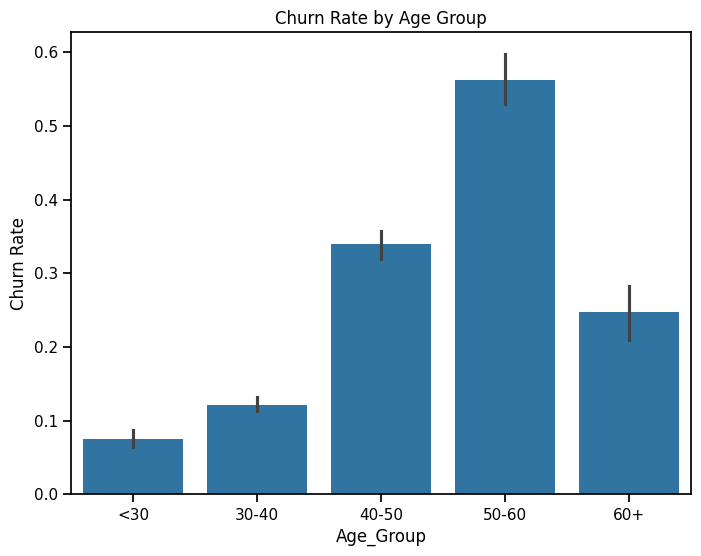

In [100]:
# Define age groups
age_bins = [18, 30, 40, 50, 60, 100]
age_labels = ['<30', '30-40', '40-50', '50-60', '60+']
churn_data['Age_Group'] = pd.cut(churn_data['Age'], bins=age_bins, labels=age_labels)

# Plot churn rate by age group
plt.figure(figsize=(8, 6))
sns.barplot(x='Age_Group', y='Exited', data=churn_data, estimator=np.mean)
plt.title('Churn Rate by Age Group')
plt.ylabel('Churn Rate')
plt.show()


Churn rate by balance level

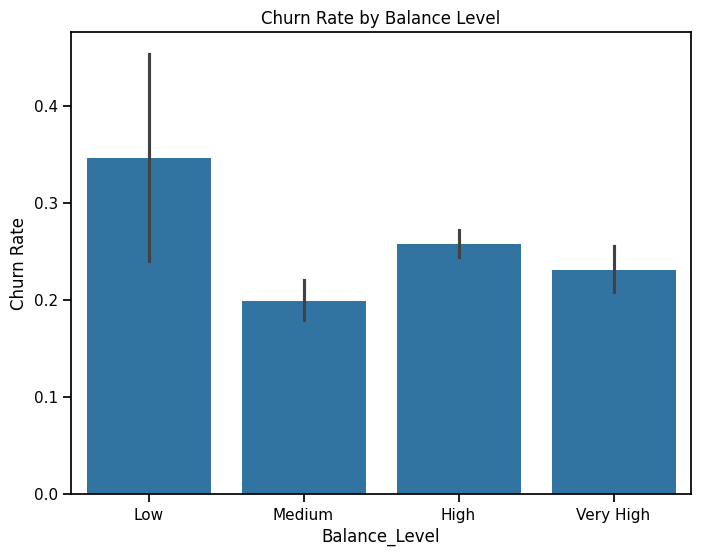

In [101]:
# Define balance levels
balance_bins = [0, 50000, 100000, 150000, 250000]
balance_labels = ['Low', 'Medium', 'High', 'Very High']
churn_data['Balance_Level'] = pd.cut(churn_data['Balance'], bins=balance_bins, labels=balance_labels)

# Plot churn rate by balance level
plt.figure(figsize=(8, 6))
sns.barplot(x='Balance_Level', y='Exited', data=churn_data, estimator=np.mean)
plt.title('Churn Rate by Balance Level')
plt.ylabel('Churn Rate')
plt.show()

Churn Rate by Tenure

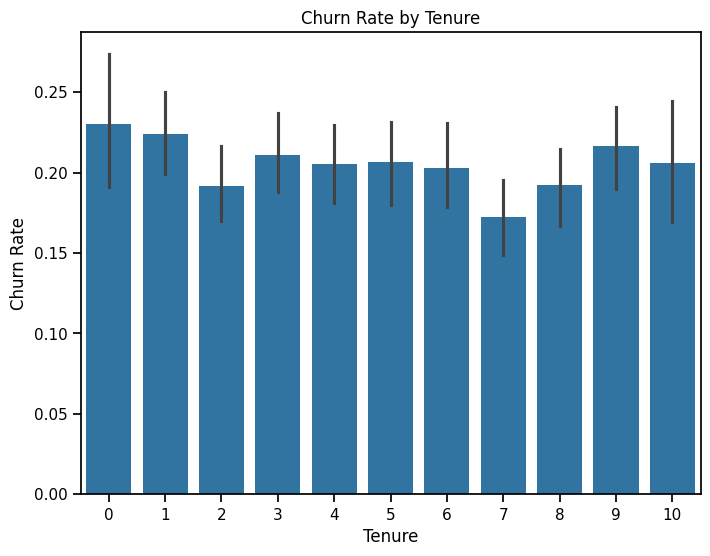

In [102]:
# Plot churn rate by tenure
plt.figure(figsize=(8, 6))
sns.barplot(x='Tenure', y='Exited', data=churn_data, estimator=np.mean)
plt.title('Churn Rate by Tenure')
plt.ylabel('Churn Rate')
plt.show()

# Relationship Between CreditScore and Churn

Boxplot of Credit Score by Churn Status

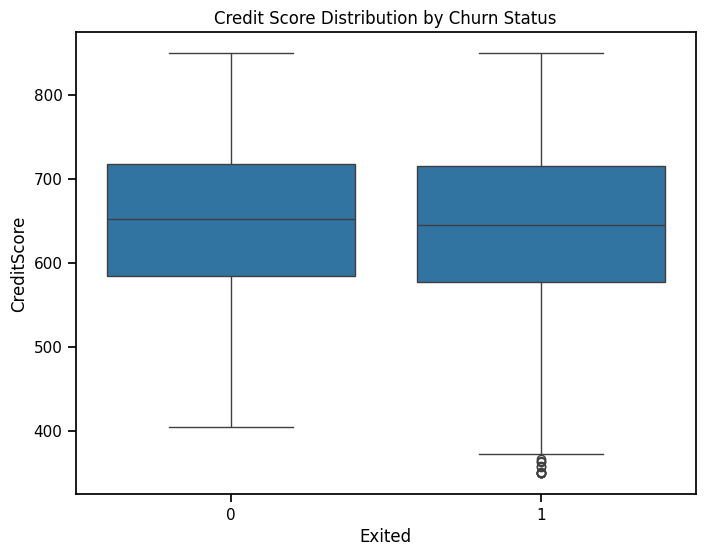

In [103]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Exited', y='CreditScore', data=churn_data)
plt.title('Credit Score Distribution by Churn Status')
plt.show()

Distribution Plot of Credit Score by Churn Status

<ipython-input-104-25a461b4df98>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(churn_data[churn_data['Exited'] == 0]['CreditScore'], label='Not Churned', shade=True)
<ipython-input-104-25a461b4df98>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(churn_data[churn_data['Exited'] == 1]['CreditScore'], label='Churned', shade=True)


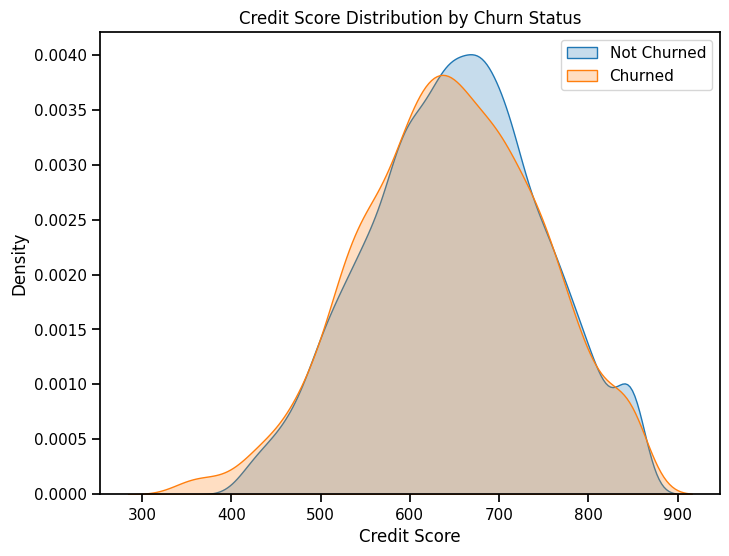

In [104]:
plt.figure(figsize=(8, 6))
sns.kdeplot(churn_data[churn_data['Exited'] == 0]['CreditScore'], label='Not Churned', shade=True)
sns.kdeplot(churn_data[churn_data['Exited'] == 1]['CreditScore'], label='Churned', shade=True)
plt.title('Credit Score Distribution by Churn Status')
plt.xlabel('Credit Score')
plt.legend()
plt.show()

# Feature Interactions

Interaction between Geography and Gender

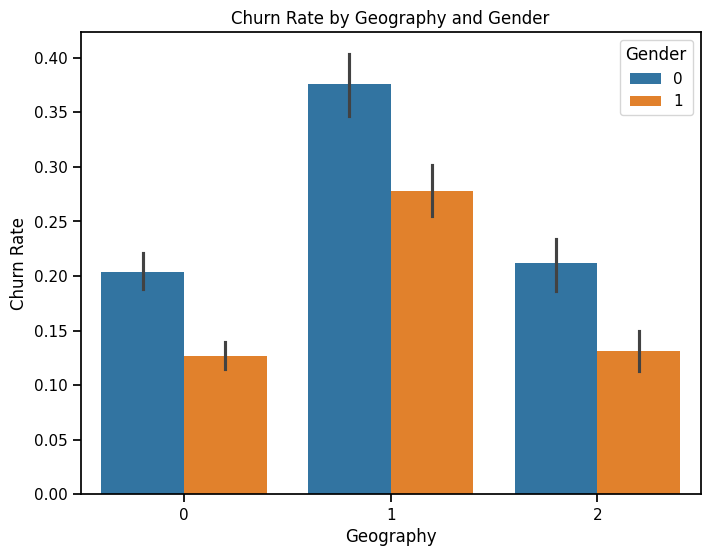

In [105]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Geography', y='Exited', hue='Gender', data=churn_data, estimator=np.mean)
plt.title('Churn Rate by Geography and Gender')
plt.ylabel('Churn Rate')
plt.show()

Product Engagement Analysis

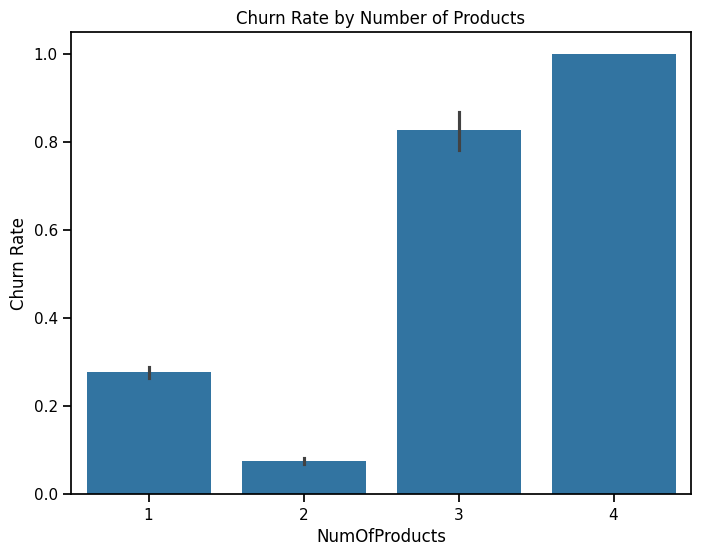

In [106]:
plt.figure(figsize=(8, 6))
sns.barplot(x='NumOfProducts', y='Exited', data=churn_data, estimator=np.mean)
plt.title('Churn Rate by Number of Products')
plt.ylabel('Churn Rate')
plt.show()

# Customer Segmentation using Clustering

K-means Clustering

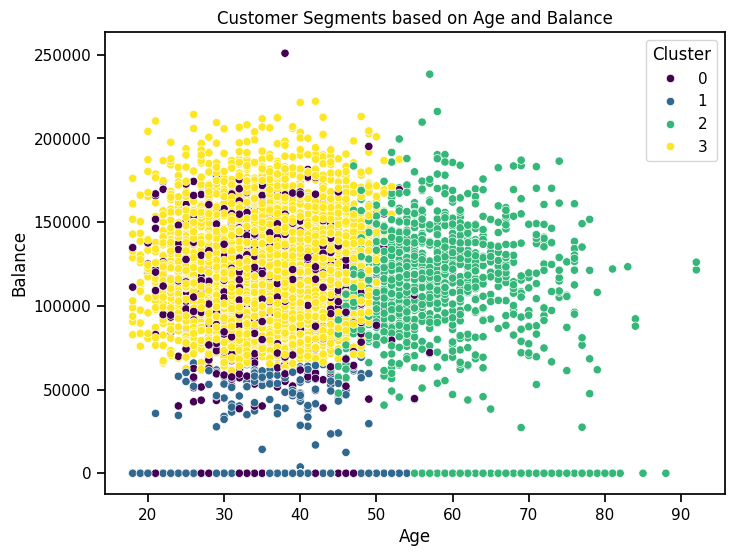

In [107]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Select features for clustering
features = churn_data[['CreditScore', 'Age', 'Balance', 'EstimatedSalary', 'Engagement_Score']]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Apply KMeans
kmeans = KMeans(n_clusters=4, random_state=42)
churn_data['Cluster'] = kmeans.fit_predict(scaled_features)

# Plot clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Age', y='Balance', hue='Cluster', data=churn_data, palette='viridis')
plt.title('Customer Segments based on Age and Balance')
plt.show()

Time-Based Analysis (Tenure)

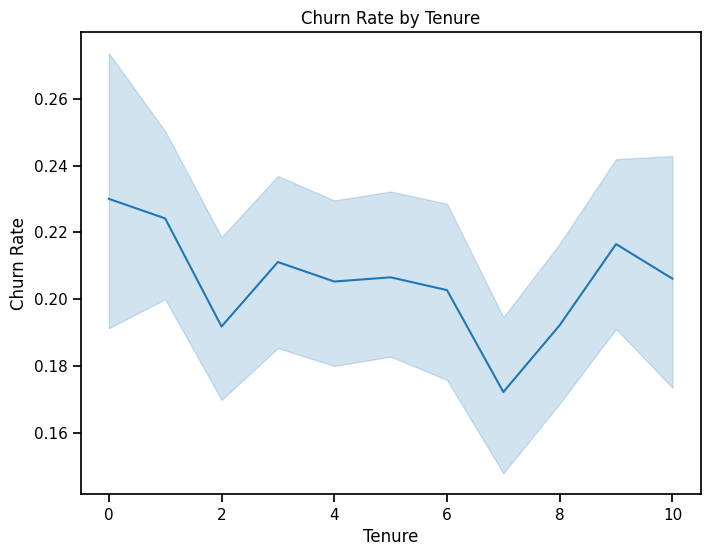

In [108]:
plt.figure(figsize=(8, 6))
sns.lineplot(x='Tenure', y='Exited', data=churn_data, estimator=np.mean)
plt.title('Churn Rate by Tenure')
plt.ylabel('Churn Rate')
plt.show()

Feature Importance for Churn Prediction using Random Forest

In [109]:
olddata = churn_data.copy()
olddata.head(3)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,...,EstimatedSalary,Exited,Balance_per_Product,CreditScore_per_Age,High_Balance,Senior_Citizen,Engagement_Score,Age_Group,Balance_Level,Cluster
0,1,15634602,Hargrave,619,0,0,42,2,0.00,1,...,101348.88,1,0.000000,14.738095,0,0,1,40-50,NaN,1
1,2,15647311,Hill,608,2,0,41,1,83807.86,1,...,112542.58,0,83807.860000,14.829268,0,0,1,40-50,Medium,3
2,3,15619304,Onio,502,0,0,42,8,159660.80,3,...,113931.57,1,53220.266667,11.952381,1,0,0,40-50,Very High,3


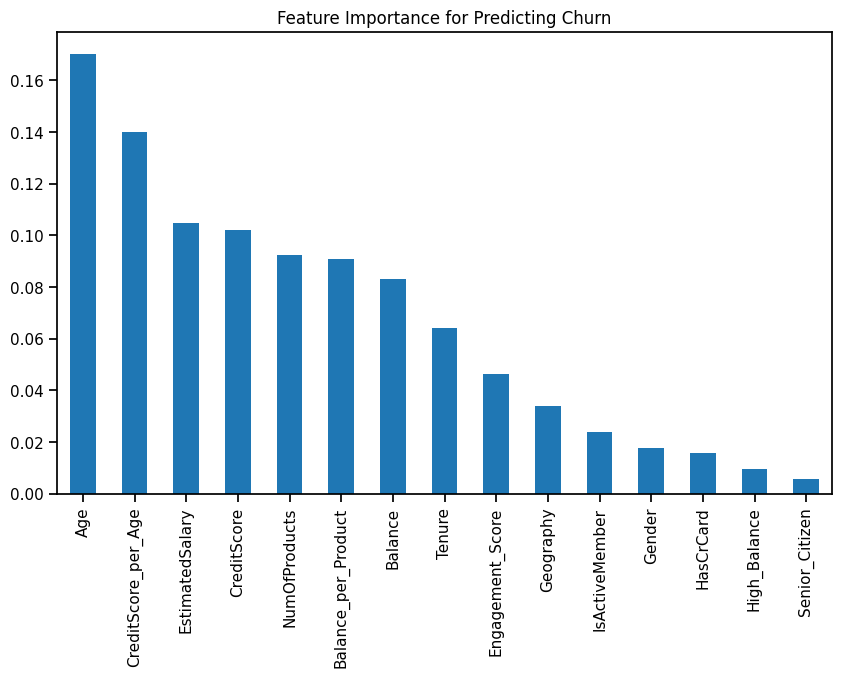

In [110]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

# Define features and target
X = churn_data.drop(columns=['Exited', 'RowNumber', 'CustomerId', 'Surname', 'Age_Group', 'Balance_Level', 'Cluster'])
y = churn_data['Exited']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Feature importance
importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
importances.plot(kind='bar')
plt.title('Feature Importance for Predicting Churn')
plt.show()

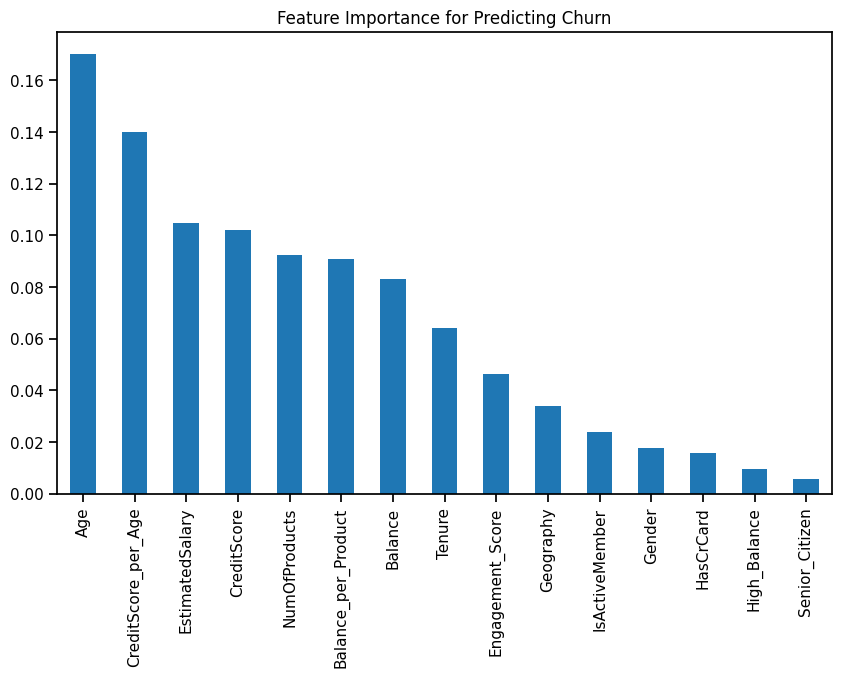

In [111]:
# Train Random Forest model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Feature importance
importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
importances.plot(kind='bar')
plt.title('Feature Importance for Predicting Churn')
plt.show()

In [112]:
# # Plot histograms for each numerical feature
# churn_data[numerical_features].hist(figsize=(15, 10), bins=20, edgecolor='black')
# plt.suptitle('Distribution of Numerical Features')
# plt.show()

In [113]:
# # Plot numerical features against 'Exited' (churn)
# for feature in numerical_features:
#     plt.figure(figsize=(8, 5))
#     sns.boxplot(x='Exited', y=feature, data=churn_data)
#     plt.title(f'{feature} vs Churn')
#     plt.show()

In [114]:
# Checking Skewness of Continous Features.

cols = ["CreditScore","Age","EstimatedSalary"]
churn_data[cols].skew().to_frame().rename(columns={0:"Feature Skewness"})


,Feature Skewness
CreditScore,-0.071607
Age,1.011320
EstimatedSalary,0.002085


Age Feature is highly right-skewed , which conveys that there is presence of positive outliers.

Skewness can negatively impact the performance of certain machine learning algorithms, like DecisionTree & Linear Models.

To overcome the right-skewed distribution we can use log normal transformation to achieve a normal distribution.

In [115]:
old_age = churn_data["Age"]     ##Storing the previous Age values to compare these values with the transformed values.
churn_data["Age"] = np.log(churn_data["Age"])

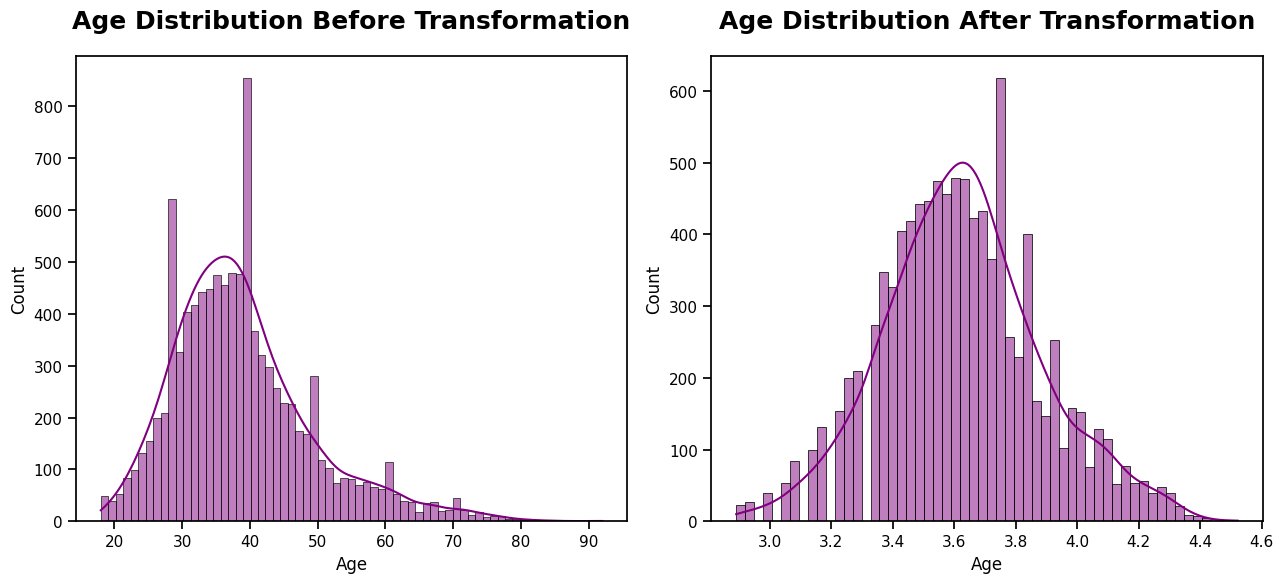

In [116]:
plt.figure(figsize=(13,6))
plt.subplot(1,2,1)
sns.histplot(old_age, color="purple", kde=True)
plt.title("Age Distribution Before Transformation",fontweight="black",size=18,pad=20)

plt.subplot(1,2,2)
sns.histplot(churn_data["Age"], color="purple", kde=True)
plt.title("Age Distribution After Transformation",fontweight="black",size=18,pad=20)
plt.tight_layout()
plt.show()

After applying log normal transformation the age feature has achieved a normal distribution.

This will help model to find more relevant patterns and build a more accurate model.

In [117]:
# Min-Max normalization function
def min_max_normalize(column):
    return (column - column.min()) / (column.max() - column.min())

# List of numerical columns to normalize
numerical_cols = ['CreditScore', 'Age', 'Tenure', 'EstimatedSalary', 'NumOfProducts', 'Balance']

# Apply normalization to each numerical column
for col in numerical_cols:
    churn_data[col] = min_max_normalize(churn_data[col])

In [118]:
churn_data.head(3)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,...,EstimatedSalary,Exited,Balance_per_Product,CreditScore_per_Age,High_Balance,Senior_Citizen,Engagement_Score,Age_Group,Balance_Level,Cluster
0,1,15634602,Hargrave,0.538,0,0,0.519363,0.2,0.000000,0.000000,...,0.506735,1,0.000000,14.738095,0,0,1,40-50,NaN,1
1,2,15647311,Hill,0.516,2,0,0.504592,0.1,0.334031,0.000000,...,0.562709,0,83807.860000,14.829268,0,0,1,40-50,Medium,3
2,3,15619304,Onio,0.304,0,0,0.519363,0.8,0.636357,0.666667,...,0.569654,1,53220.266667,11.952381,1,0,0,40-50,Very High,3


In [119]:
# checking how balanced the true labels are

class_0 = churn_data[churn_data['Exited'] == 0].shape[0]
print(f'Number of customers who were retained: ', class_0)

class_1 = churn_data[churn_data['Exited'] == 1].shape[0]
print(f'Number of customers who closed their account: ', class_1)

Number of customers who were retained:  7963
Number of customers who closed their account:  2037


There are 10,000 rows in the dataset. Of those, 7,963 have an 'Exited' value of 0, meaning the customer was retained, and 2,037 have an 'Exited' value of 1, meaning the customer closed their account with the bank. Due to the imbalanced nature of the dataset, accuracy will not be the best metric for evaluating our models. Precision measures the number of true positive cases to all the true positive cases + the false positive cases. Recall measures the proportion of true positive cases to all the true positive cases + the false negative cases. Therefore, precision is the ratio between true positives and all positives and recall is the measure of the model correctly identifying true positives. We will use the F-1 score as our main metric for evaluation, because it is more informative than accuracy as it takes into account both false positives and false negatives. It is the harmonic mean of precision and recall and commonly used for evaluating binary classification models, especially when there is class imbalance. THe highest score for the F1 score is 1, indicating perfect precision and recall.

In [120]:
#X['CustomerId'] = churn_data['CustomerId']

In [121]:
X = churn_data[['CreditScore','Gender','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary']]
y = churn_data['Exited']

In [122]:
from sklearn.model_selection import train_test_split

# First split (80/20 train/test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=42, stratify=y
)

# Second split (80/20 train/validation)
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42, stratify=y_train
)

print('X_train shape: ', X_train.shape)
print('y_train shape: ', y_train.shape)
print('X_val shape: ', X_val.shape)
print('y_val shape: ', y_val.shape)
print('X_test shape: ', X_test.shape)
print('y_test shape: ', y_test.shape)

X_train shape:  (7200, 9)
y_train shape:  (7200,)
X_val shape:  (1800, 9)
y_val shape:  (1800,)
X_test shape:  (1000, 9)
y_test shape:  (1000,)


In [123]:
# from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=7)
# print('X_train shape: ', X_train.shape)
# print('y_train shape: ', y_train.shape)
# print('X_test shape: ', X_test.shape)
# print('y_test shape: ', y_test.shape)

# Logistic Regression

In [124]:
from sklearn.linear_model import LogisticRegression

# Defining the model
lr = LogisticRegression()

# Training the model:
lr.fit(X_train, y_train)

# Predicting target values by using X_val and our model:
y_pred0 = lr.predict(X_val)

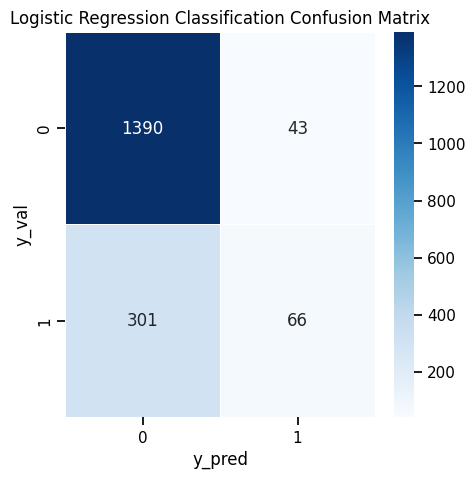

In [125]:
# Confusion matrix for visulalization of our prediction accuracy:
from sklearn.metrics import confusion_matrix

# Creating the confusion matrix:
lr_cm = confusion_matrix(y_val, y_pred0)

#Visualization:
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(lr_cm, annot=True, linewidth=0.7, fmt='.0f', ax=ax, cmap='Blues')
plt.title('Logistic Regression Classification Confusion Matrix')
plt.xlabel('y_pred')
plt.ylabel('y_val')
plt.show()

In [126]:
# Model Evaluation using Different Metric Value
print(classification_report(y_val, y_pred0))


              precision    recall  f1-score   support

           0       0.82      0.97      0.89      1433
           1       0.61      0.18      0.28       367

    accuracy                           0.81      1800
   macro avg       0.71      0.57      0.58      1800
weighted avg       0.78      0.81      0.76      1800



In [127]:
# Displaying a few predictions vs actual labels
for i in range(10):  # Change 10 to see more or fewer predictions
    print(f"Actual: {y_test.iloc[i]}, Predicted: {y_pred0[i]}")

Actual: 0, Predicted: 0
Actual: 0, Predicted: 0
Actual: 0, Predicted: 0
Actual: 0, Predicted: 0
Actual: 0, Predicted: 0
Actual: 0, Predicted: 0
Actual: 1, Predicted: 0
Actual: 0, Predicted: 0
Actual: 1, Predicted: 0
Actual: 1, Predicted: 0


* We can observe that recall, precision, and F1 score are all the same, it means that our model is achieving perfect balance between correctly identifying positive samples (recall) and minimizing false positives (precision).



* The high values for F1 score, recall score, and precision score, all of which are approximately 0.825. These metrics suggest that the model achieves good accuracy in predicting the positive class.

# SVM

In [128]:
from sklearn.svm import SVC

# Defining SVM model
svm = SVC(random_state=2)

# Training model:
svm.fit(X_train, y_train)

# Predicting target values by using x_val and our model:
y_pred1 = svm.predict(X_val)

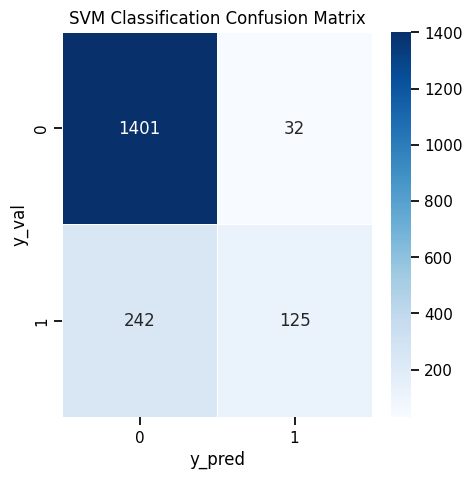

In [129]:
# Confusion matrix for visualization our prediction accuracy:
from sklearn.metrics import confusion_matrix

# Creating the confusion matrix:
svm_cm = confusion_matrix(y_val, y_pred1)

# Visualization:
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(svm_cm, annot=True, linewidth=0.7, fmt='.0f', ax=ax, cmap='Blues')
plt.title('SVM Classification Confusion Matrix')
plt.xlabel('y_pred')
plt.ylabel('y_val')
plt.show()

In [130]:
# Model Evaluation using Different Metric Value
print(classification_report(y_val, y_pred1))


              precision    recall  f1-score   support

           0       0.85      0.98      0.91      1433
           1       0.80      0.34      0.48       367

    accuracy                           0.85      1800
   macro avg       0.82      0.66      0.69      1800
weighted avg       0.84      0.85      0.82      1800



In [131]:
# Displaying a few predictions vs actual labels
for i in range(10):  # Change 10 to see more or fewer predictions
    print(f"Actual: {y_test.iloc[i]}, Predicted: {y_pred1[i]}")

Actual: 0, Predicted: 0
Actual: 0, Predicted: 0
Actual: 0, Predicted: 0
Actual: 0, Predicted: 0
Actual: 0, Predicted: 0
Actual: 0, Predicted: 0
Actual: 1, Predicted: 0
Actual: 0, Predicted: 0
Actual: 1, Predicted: 1
Actual: 1, Predicted: 0


#KNN

In [132]:
from sklearn.neighbors import KNeighborsClassifier

# checking optimal value for k (number of nieghbors)

for i in range(1, 21):
  # define the knn model
  knn = KNeighborsClassifier(n_neighbors=i)

  # fit the knn model
  knn.fit(X_train, y_train)

  # make predictions using the val set
  y_pred = knn.predict(X_val)

  f1 = f1_score(y_val, y_pred, average='weighted') # weighted average accounts for class imbalance
  print(f'F1 score for {i} neighbors: {f1}')

F1 score for 1 neighbors: 0.763840877029645
F1 score for 2 neighbors: 0.761391530752429
F1 score for 3 neighbors: 0.7782450965375601
F1 score for 4 neighbors: 0.765764119601329
F1 score for 5 neighbors: 0.7837581444925558
F1 score for 6 neighbors: 0.7693666158899484
F1 score for 7 neighbors: 0.7784848819436325
F1 score for 8 neighbors: 0.7628763250979298
F1 score for 9 neighbors: 0.7721831660156365
F1 score for 10 neighbors: 0.7589464131945939
F1 score for 11 neighbors: 0.7647359139784947
F1 score for 12 neighbors: 0.7654522928469288
F1 score for 13 neighbors: 0.7666460537192245
F1 score for 14 neighbors: 0.7646510774250561
F1 score for 15 neighbors: 0.7723147953043861
F1 score for 16 neighbors: 0.7648717178550573
F1 score for 17 neighbors: 0.7708485931613466
F1 score for 18 neighbors: 0.7650836162600869
F1 score for 19 neighbors: 0.7705635099585341
F1 score for 20 neighbors: 0.7609486292376026


In [133]:
# use k=5
# define the knn model
knn = KNeighborsClassifier(n_neighbors=5)

# fit the knn model
knn.fit(X_train, y_train)

# make predictions using the val set
y_pred = knn.predict(X_val)

f1 = f1_score(y_val, y_pred, average='weighted') # weighted average accounts for class imbalance
print(f'F1 score for KNN algorithm: {f1}')

F1 score for KNN algorithm: 0.7837581444925558


In [134]:
# display all metrics
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.94      0.89      1433
           1       0.55      0.30      0.39       367

    accuracy                           0.81      1800
   macro avg       0.69      0.62      0.64      1800
weighted avg       0.78      0.81      0.78      1800



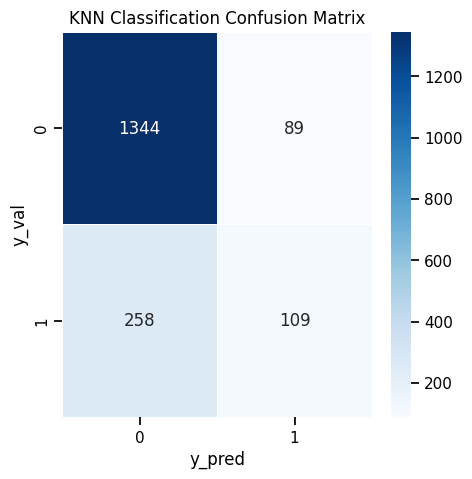

In [135]:
# Creating the confusion matrix:
knn_cm = confusion_matrix(y_val, y_pred)

# Visualization:
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(knn_cm, annot=True, linewidth=0.7, fmt='.0f', ax=ax, cmap='Blues')
plt.title('KNN Classification Confusion Matrix')
plt.xlabel('y_pred')
plt.ylabel('y_val')
plt.show()

In [136]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(max_depth=5, random_state=42)

tree_clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = tree_clf.predict(X_val)

f1 = f1_score(y_val, y_pred, average='weighted') # weighted average accounts for class imbalance
print(f'F1 score for decision classifier algorithm: {f1}')

F1 score for decision classifier algorithm: 0.8212047079629826


In [137]:
# display all metrics
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.97      0.91      1433
           1       0.76      0.35      0.48       367

    accuracy                           0.84      1800
   macro avg       0.81      0.66      0.69      1800
weighted avg       0.83      0.84      0.82      1800



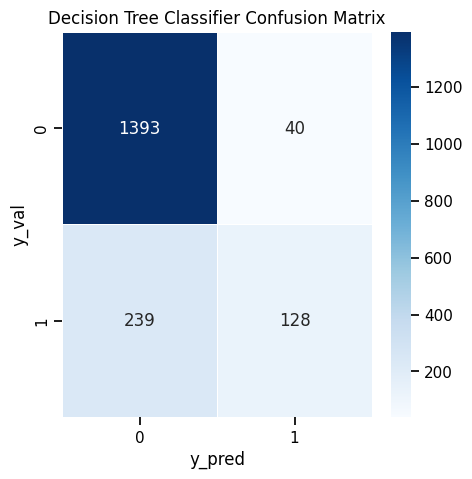

In [138]:
# Creating the confusion matrix:
tree_cm = confusion_matrix(y_val, y_pred)

# Visualization:
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(tree_cm, annot=True, linewidth=0.7, fmt='.0f', ax=ax, cmap='Blues')
plt.title('Decision Tree Classifier Confusion Matrix')
plt.xlabel('y_pred')
plt.ylabel('y_val')
plt.show()

#Random Forest

In [139]:
#conduct hyperparameter tuning for n_estimators and max_depth

from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_dist = {'n_estimators': randint(50,500),
              'max_depth': randint(1,20)}

# Create a random forest classifier
rf = RandomForestClassifier(random_state=42)

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rf,
                                 param_distributions = param_dist,
                                 n_iter=5,
                                 cv=5,
                                 random_state=42)

# Fit the random search object to the data
rand_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_iter=5,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7cca4abcbc10>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7cca4aaab580>},
                   random_state=42)

In [140]:
# Create a variable for the best model
best_rf = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)

Best hyperparameters: {'max_depth': 7, 'n_estimators': 171}


In [141]:
# define the random forest model
rf = RandomForestClassifier(n_estimators=171, max_depth=7, random_state=42)

# fit the random forest model
rf.fit(X_train, y_train)

# make predictions using the val set
y_pred = rf.predict(X_val)

f1 = f1_score(y_val, y_pred, average='weighted') # weighted average accounts for class imbalance
print(f'F1 score for random forest algorithm: {f1}')

F1 score for random forest algorithm: 0.8263970261772787


In [142]:
# display all metrics
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.97      0.91      1433
           1       0.77      0.37      0.50       367

    accuracy                           0.85      1800
   macro avg       0.81      0.67      0.70      1800
weighted avg       0.84      0.85      0.83      1800



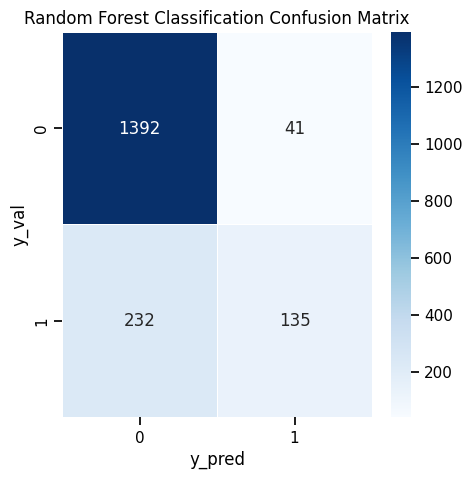

In [143]:
# Creating the confusion matrix:
rf_cm = confusion_matrix(y_val, y_pred)

# Visualization:
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(rf_cm, annot=True, linewidth=0.7, fmt='.0f', ax=ax, cmap='Blues')
plt.title('Random Forest Classification Confusion Matrix')
plt.xlabel('y_pred')
plt.ylabel('y_val')
plt.show()

In [144]:
# Use the best model to predict on the test data
y_test_pred = best_rf.predict(X_test)

# Interpret predictions (0 = staying, 1 = exiting)
staying_count_pred = sum(y_test_pred == 0)
exiting_count_pred = sum(y_test_pred == 1)

staying_count_true = sum(y_test == 0)
exiting_count_true = sum(y_test == 1)

# Create bar chart data
categories = ['Staying', 'Exiting']
true_counts = [staying_count_true, exiting_count_true]
pred_counts = [staying_count_pred, exiting_count_pred]

In [145]:
# Calculate the F1 score for the predictions
f1 = f1_score(y_test, y_test_pred, average='weighted')  # weighted average accounts for class imbalance

# Print the F1 score
print(f'F1 score for the random forest prediction: {f1}')


F1 score for the random forest prediction: 0.8246234818605434


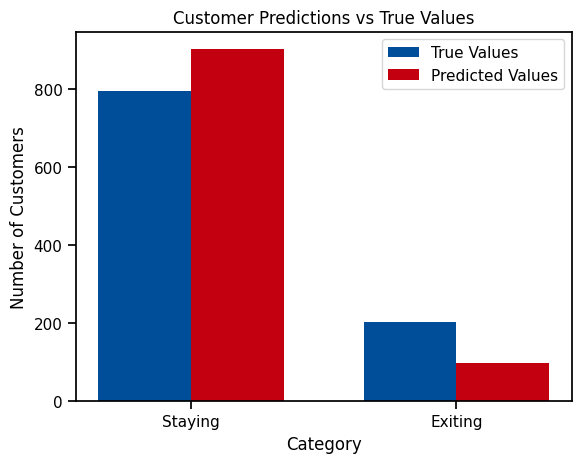

In [146]:
# Create the bar chart
bar_width = 0.35
x = np.arange(len(categories))  # Position of groups

plt.bar(x - bar_width / 2, true_counts, bar_width, label='True Values', color='#004D99')
plt.bar(x + bar_width / 2, pred_counts, bar_width, label='Predicted Values', color='#C30010')

# Add labels and title
plt.title('Customer Predictions vs True Values')
plt.xlabel('Category')
plt.ylabel('Number of Customers')
plt.xticks(x, categories)
plt.legend()

# Show the plot
plt.show()

In [147]:
olddata.head(3)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,...,EstimatedSalary,Exited,Balance_per_Product,CreditScore_per_Age,High_Balance,Senior_Citizen,Engagement_Score,Age_Group,Balance_Level,Cluster
0,1,15634602,Hargrave,619,0,0,42,2,0.00,1,...,101348.88,1,0.000000,14.738095,0,0,1,40-50,NaN,1
1,2,15647311,Hill,608,2,0,41,1,83807.86,1,...,112542.58,0,83807.860000,14.829268,0,0,1,40-50,Medium,3
2,3,15619304,Onio,502,0,0,42,8,159660.80,3,...,113931.57,1,53220.266667,11.952381,1,0,0,40-50,Very High,3


In [148]:
# Add selected features to the predictions DataFrame
selected_features = ['CustomerId', 'CreditScore', 'Gender', 'Age', 'Tenure', 'Balance',
                     'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']

X_test['CustomerId'] = olddata.iloc[X_test.index]['CustomerId']

# Create a DataFrame to include CustomerId, true status, and predicted status
predictions = pd.DataFrame({
    'CustomerId': X_test['CustomerId'],
    'True_Status': y_test,             # True labels
    'Predicted_Status': y_test_pred    # Predicted labels
})

# Add additional features to the predictions DataFrame
for feature in selected_features[1:]:  # Skip CustomerId as it's already included
    predictions[feature] = olddata.iloc[X_test.index][feature].values

# Separate customers who are staying and leaving according to predictions
staying_customers = predictions[predictions['Predicted_Status'] == 0]
exiting_customers = predictions[predictions['Predicted_Status'] == 1]

In [149]:

# Add Customer_ID to the corresponding split for test data
#X_test['CustomerId'] = churn_data.iloc[X_test.index]['CustomerId']

# Create a DataFrame to include Customer_ID, true status, and predicted status
#predictions = pd.DataFrame({
#    'CustomerId': X_test['CustomerId'],
#    'True_Status': y_test,  # True labels
#    'Predicted_Status': y_test_pred  # Predicted labels
#})

# Separate customers who are staying and exiting according to predictions
#staying_customers = predictions[predictions['Predicted_Status'] == 0]
#exiting_customers = predictions[predictions['Predicted_Status'] == 1]

# Save each to separate CSV files
# Save only selected features to CSV files (excluding True_Status and Predicted_Status)
staying_customers[selected_features].to_csv('staying_customers.csv', index=False)
exiting_customers[selected_features].to_csv('exiting_customers.csv', index=False)


In [150]:
# Print the Customer IDs
print("Customers Predicted to Stay:")
print(staying_customers['CustomerId'].tolist())

print("\nCustomers Predicted to Exit:")
print(exiting_customers['CustomerId'].tolist())

Customers Predicted to Stay:
[15601030, 15779738, 15694039, 15644699, 15749123, 15638149, 15659092, 15667216, 15567778, 15802758, 15699963, 15777904, 15572801, 15713853, 15759872, 15584091, 15727944, 15672610, 15771569, 15603323, 15776518, 15638003, 15681327, 15803804, 15618182, 15758831, 15687218, 15644796, 15641110, 15732437, 15691004, 15785920, 15705899, 15706899, 15716236, 15645029, 15724834, 15788291, 15609254, 15683375, 15740494, 15762937, 15797751, 15570990, 15632050, 15632118, 15776939, 15794276, 15707110, 15732774, 15612627, 15650244, 15640409, 15775905, 15777893, 15694395, 15791111, 15677369, 15813590, 15716324, 15768104, 15786539, 15574115, 15665110, 15649129, 15572361, 15767598, 15759284, 15771059, 15767894, 15801218, 15683841, 15668081, 15585855, 15782311, 15603170, 15585388, 15578546, 15690164, 15627365, 15647207, 15579892, 15612455, 15619045, 15678201, 15665327, 15596303, 15567897, 15727556, 15724099, 15773512, 15782569, 15793478, 15735221, 15578788, 15792222, 15684318, 

In [151]:
from google.colab import files

# Download the files
#files.download('staying_customers.csv')
#files.download('exiting_customers.csv')


In [152]:
olddata.head(3)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,...,EstimatedSalary,Exited,Balance_per_Product,CreditScore_per_Age,High_Balance,Senior_Citizen,Engagement_Score,Age_Group,Balance_Level,Cluster
0,1,15634602,Hargrave,619,0,0,42,2,0.00,1,...,101348.88,1,0.000000,14.738095,0,0,1,40-50,NaN,1
1,2,15647311,Hill,608,2,0,41,1,83807.86,1,...,112542.58,0,83807.860000,14.829268,0,0,1,40-50,Medium,3
2,3,15619304,Onio,502,0,0,42,8,159660.80,3,...,113931.57,1,53220.266667,11.952381,1,0,0,40-50,Very High,3


In [153]:
import pandas as pd

# Add selected features to the predictions DataFrame
selected_features = ['CustomerId', 'CreditScore', 'Gender', 'Age', 'Tenure', 'Balance',
                     'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Balance_per_Product', 'CreditScore_per_Age',	'High_Balance',
                     	'Senior_Citizen',	'Engagement_Score', 'Age_Group', 'Balance_Level',	'Cluster']

# Add CustomerId to X_test if not already present
X_test['CustomerId'] = olddata.iloc[X_test.index]['CustomerId']

# Create a DataFrame to include CustomerId, true status, and predicted status
predictions = pd.DataFrame({
    'CustomerId': X_test['CustomerId'],
    'True_Status': y_test,             # True labels
    'Predicted_Status': y_test_pred    # Predicted labels
})

# Add additional features to the predictions DataFrame
for feature in selected_features[1:]:  # Skip CustomerId as it's already included
    predictions[feature] = olddata.iloc[X_test.index][feature].values

# Save predictions (with selected features, true status, and predicted status) to CSV
output_file = 'customers_predictions.csv'
predictions.to_csv(output_file, index=False)

print(f"CSV file saved as {output_file}")



CSV file saved as customers_predictions.csv


In [154]:
# Reload the CSV to check its content
check_df = pd.read_csv(output_file)
print(check_df.head())


   CustomerId  True_Status  Predicted_Status  CreditScore  Gender  Age  \
0    15601030            0                 0          777       0   34   
1    15779738            0                 0          534       1   24   
2    15694039            0                 0          650       0   46   
3    15644699            0                 0          850       0   40   
4    15749123            0                 0          743       1   45   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       5   96693.66              1          1               1   
1       1       0.00              1          1               1   
2       9  149003.76              2          1               0   
3       0       0.00              2          1               0   
4       7  157332.26              1          1               0   

   EstimatedSalary  Balance_per_Product  CreditScore_per_Age  High_Balance  \
0        172618.52             96693.66            22.852941             0   
1 

In [156]:
files.download('customers_predictions.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>